# Student Performance Indicator

### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem Statement

- This project understands how the student's performance(test scores) is affected by other variables such as Parental level of education, Lunch and Test Preparation course.

#### 2) Data  Collection

- Dataset Source -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasteld=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as pandas DataFrame

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

#### Show Top 5 Records

In [4]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Shape of the Dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset Information

- gender:sex of students -> (Male/Female)
- race/ethinicity:ethinicity of students -> (Group A,B,C,D,E)
- parental level of education: parents' final education ->(bachelor's degree, some college, master's degree, associate's degree,high school)
- lunch:having lunch before test(standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

#### 3. Data Checks to perform

- Check Missing Values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

#### 3.3 Check data types

In [8]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.5 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.6 Check Statistics of data set

In [10]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

#### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.9;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher =17

#### 3.7 Exploring Data

In [11]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [12]:
# define numerical & categorical columns
num_cols = df._get_numeric_data().columns
cat_cols = set(df.columns) - set(num_cols)

In [13]:
print(num_cols)
print(cat_cols) 

Index(['math score', 'reading score', 'writing score'], dtype='object')
{'race/ethnicity', 'lunch', 'parental level of education', 'test preparation course', 'gender'}


In [14]:
numerical_cols=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_cols=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("we have {} numerical columns".format(len(numerical_cols),numerical_cols))
print("we have {} categorical columns".format(len(categorical_cols),categorical_cols))

we have 3 numerical columns
we have 5 categorical columns


#### 3.8 Adding Columns for "Total Score" and "Average"

In [15]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.333333

In [18]:
reading_full = df[df['reading score'] ==100]['average_score'].count()
writing_full = df[df['writing score'] ==100]['average_score'].count()
math_full = df[df['math score'] ==100]['average_score'].count()

print("Number of students who got full marks in reading: ",reading_full)
print("Number of students who got full marks in writing: ",writing_full)
print("Number of students who got full marks in math: ",math_full)

Number of students who got full marks in reading:  17
Number of students who got full marks in writing:  14
Number of students who got full marks in math:  7


In [17]:
reading_less_20=df[df['reading score']<=20]['average_score'].count()
writing_less_20=df[df['writing score']<=20]['average_score'].count()
math_less_20=df[df['math score']<=20]['average_score'].count()

print("Number of students having reading score less than 20: ",reading_less_20)
print("Number of students having writing score less than 20: ",writing_less_20) 
print("Number of students having math score less than 20: ",math_less_20)

Number of students having reading score less than 20:  1
Number of students having writing score less than 20:  3
Number of students having math score less than 20:  4


#### Insights

- From above values we get students have performed the worst in Maths
- Best Performance is in reading section

### 4. Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function(KDE)

4.1.1 Histogram & KDE

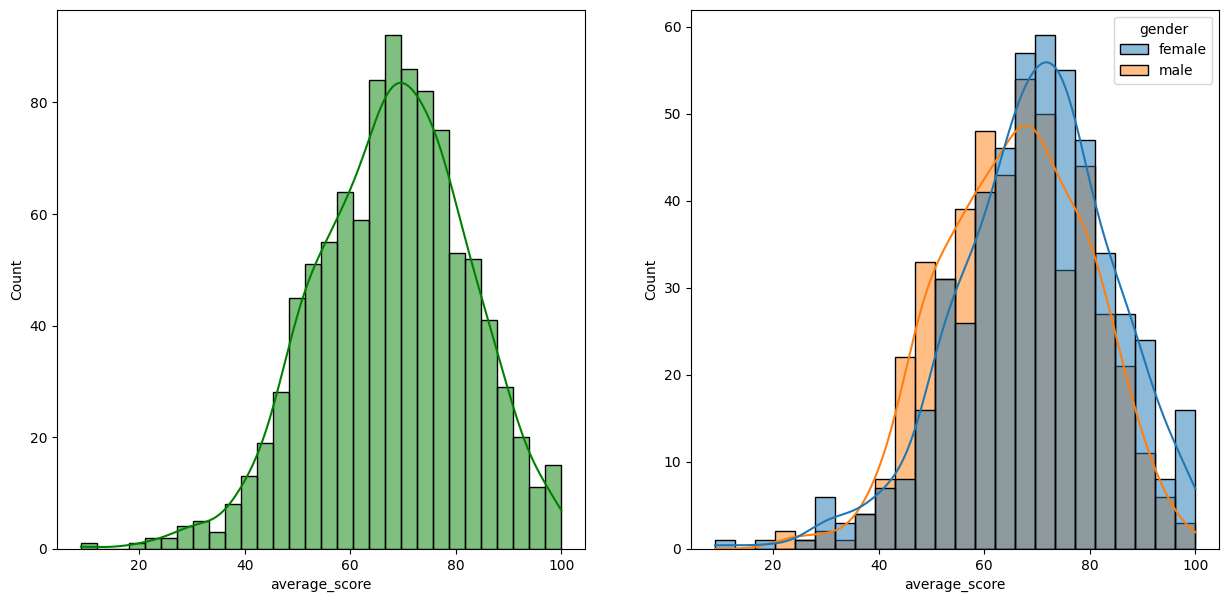

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()